In [1]:
# Importation
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import os

import jap_data
import jap_alphabet
import jap_JPTL5_80kanji
import jap_JLPT5_vocabulary
import jap_JLPT5_kanji_and_basic_vocabulary
import jap_JLPT5_sentences
import global_functions
import exam

# TO-DO LIST

    ## Done
    ## Done
    ## Done
    ## Done
    ## Done
    ## Done
    ## Done
    ## Done
    ## Done
    ## Done
    ## Done
    ## Done
    ## Show evaluation score => Improve "Global score" legend

In [2]:
len(jap_data.JLPT5_voc_fr), len(jap_data.JLPT5_voc_jap)

(822, 822)

In [3]:
with open('JLPT5_jap_sentences.json', 'r') as file:
    data = json.load(file)

data

{'彼はどこに行きますか？': [11, 3, 'Où va-t-il ?'],
 '彼女の名前は何ですか？': [17, 3, 'Quelle est son nom ? (son féminin)'],
 '彼にはお兄さんが三人います': [4, 1, 'Il a trois grands frères.'],
 'あなたのご両親は英語が話せますか?': [4, 1, 'Est-ce que tes parents parlent anglais ?'],
 '私は寒い | 寒いです': [5, 1, "J'ai froid | Il fait froid"],
 '私の手は冷たいです | 手が冷たいです': [5,
  1,
  "J'ai les mains froides | J'ai froid aux mains"],
 '猫が好きです。': [1, 1, "J'aime les chats."],
 '私はあなたを愛しています。': [11, 3, "Je t'aime"],
 '好きな人がいますか。': [14, 3, 'Avez-vous un être cher (un amoureux) ?'],
 'すみません、あなたは誰ですか？': [10, 3, 'Excusez-moi, qui êtes-vous ?'],
 'それは何時間かかりますか？': [11, 3, "combien d'heure cela prend-t'il ?"],
 '時間がない': [2, 1, "je n'ai pas le temps"],
 '出発の時間です；出発の時間になりました。': [2,
  1,
  "c'est l'heure de partir; il est temps de partir"],
 'それは時間の問題だけです': [5, 1, "ce n'est qu'une question de temps"],
 '彼はいつ来ますか？': [14, 3, 'Quand arrive-t-il ?'],
 '私は三十一時間働きます': [5, 1, 'Je travaille pendant 31 heures.'],
 '毎日、忙しいです': [12, 3, 'Je suis occupé tous les jours.'],
 '私

In [27]:
import numpy as np

def mean_(serie_):
    sum_ = 0
    for element in serie_:
        sum_ += element
    return sum_/len(serie_)

def variance_(serie_):
    sum_ = 0
    mean = mean_(serie_)
    for element in serie_:
        sum_ += (element - mean)**2
    return sum_/len(serie_)

def standard_deviation_(serie_):
    return np.sqrt(variance_(serie_))

def centered_values(serie_):
    min_value = mean_(serie_) - 2*standard_deviation_(serie_)
    max_value = mean_(serie_) + 2*standard_deviation_(serie_)

    count_ = 0
    for element in serie_:
        if (element <= max_value) and (element >= min_value):
            count_ += 1
    
    print(f'For this series, [m - 2s; m + 2s] = [{np.round(min_value, 3)}; {np.round(max_value, 3)}]')

    return f'{100*count_/len(serie_)}% of the values of this serie are in [m - 2s; m + 2s], where m is the mean and s the standard deviation'

centered_values([1, 2, 8, 8, 9, 10, 12, 20])

For this series, [m - 2s; m + 2s] = [-2.329; 19.829]


'87.5% of the values of this serie are in [m - 2s; m + 2s], where m is the mean and s the standard deviation'

In [3]:
jap_JLPT5_sentences.JLPT5_sentences(1)

\Sentences's exercise: Japanese's sentences to kun/on yumi + french.


 Questions 1 to 10:

彼女たちは姉妹です
それは時間の問題だけです
私は時々父とスポーツをします
彼女の名前は何ですか？
私は三十一時間働きます
すみません、あなたは誰ですか？
あなたのご両親は英語が話せますか?
好きな人がいますか。
猫が好きです。
私はあなたを愛しています。

Correction time.


Japanese's to French:


Answers 1 to 10:

彼女たちは姉妹です => Kanojotachi wa shimai desu.
They are sisters


Answers 1 to 10:

それは時間の問題だけです => Sore wa jikan no mondai dake desu.
ce n'est qu'une question de temps


Answers 1 to 10:

私は時々父とスポーツをします => Watashi wa tokidoki chichi to supōtsu o shimasu.
Je fais parfois du sport avec mon père.


Answers 1 to 10:

彼女の名前は何ですか？ => Kanojo no namae wa nan desu ka?
Quelle est son nom ? (son féminin)


Answers 1 to 10:

私は三十一時間働きます => Watashi wa sanjuu ichi jikan hatarakimasu.
Je travaille pendant 31 heures.


Answers 1 to 10:

すみません、あなたは誰ですか？ => Sumimasen, anata wa dare desu ka?
Excusez-moi, qui êtes-vous ?


Answers 1 to 10:

あなたのご両親は英語が話せますか? => Anata no ryoushin wa eigo o hanasemasu ka?
Est-ce que tes parents parlen

(['私は時々父とスポーツをします', '私はあなたを愛しています。', "Qu'est-ce que tu fabriques ?"],
 85.0,
 [["Je t'aime", '私はあなたを愛しています。'],
  ['Je fais parfois du sport avec mon père.', '私は時々父とスポーツをします']])

In [3]:
jap_JLPT5_sentences.worst_score_sentences_training('JLPT5_jap_sentences.json', 0, 10)

\Sentences's exercise: Japanese's sentences to kun/on yumi + french.


 Questions 1 to 10:

それは全く関係がない、全く違うことです | 全く別のことです
彼にはお兄さんが三人います
あなたのご両親は英語が話せますか?
私は寒い | 寒いです
私の手は冷たいです | 手が冷たいです
好きな人がいますか。
彼女たちは姉妹です
それは何時間かかりますか？
時間がない
出発の時間です；出発の時間になりました。

Correction time.


Japanese's to French:


Answers 1 to 10:

それは全く関係がない、全く違うことです | 全く別のことです => Sore wa mattaku kankei ga nai, mattaku chigau koto desu. | Mattaku betsu no koto desu
ça n'a rien à voir c'est complètement autre chose


Answers 1 to 10:

彼にはお兄さんが三人います => Kare ni wa onisan ga san-nin imasu.
Il a trois grands frères.


Answers 1 to 10:

あなたのご両親は英語が話せますか? => Anata no ryoushin wa eigo o hanasemasu ka?
Est-ce que tes parents parlent anglais ?


Answers 1 to 10:

私は寒い | 寒いです => Watashi wa samui | Samui desu
J'ai froid | Il fait froid


Answers 1 to 10:

私の手は冷たいです | 手が冷たいです => Watashi no te wa tsumetai desu | Te ga tsumetai desu
J'ai les mains froides | J'ai froid aux mains


Answers 1 to 10:

好きな人がいますか。 => suki na hito ga imasuka
Ave

In [2]:
len(jap_data.FR_SENTENCES), len(jap_data.ROMANJI_SENTENCES), len(jap_data.JAP_SENTENCES)

(28, 28, 28)

In [2]:
jap_JLPT5_sentences.worst_score_sentences_training('JLPT5_jap_sentences.json', 0, 10)

\Sentences's exercise: Japanese's sentences to kun/on yumi + french.


 Questions 1 to 10:

彼はどこに行きますか？
彼女の名前は何ですか？
彼にはお兄さんが三人います
あなたのご両親は英語が話せますか?
私は寒い | 寒いです
私の手は冷たいです | 手が冷たいです
猫が好きです。
私はあなたを愛しています。
好きな人がいますか。
彼女たちは姉妹です

Correction time.


Japanese's to French:


 Answers 1 to 10:

彼はどこに行きますか？ => Kare wa doko ni ikimasu ka?
Où va-t-il ?
彼女の名前は何ですか？ => Kanojo no namae wa nan desu ka?
Quelle est son nom ? (son féminin)
彼にはお兄さんが三人います => Kare ni wa onisan ga san-nin imasu.
Il a trois grands frères.
あなたのご両親は英語が話せますか? => Anata no ryoushin wa eigo o hanasemasu ka?
Est-ce que tes parents parlent anglais ?
私は寒い | 寒いです => Watashi wa samui | Samui desu
J'ai froid | Il fait froid
私の手は冷たいです | 手が冷たいです => Watashi no te wa tsumetai desu | Te ga tsumetai desu
J'ai les mains froides | J'ai froid aux mains
猫が好きです。 => Neko ga suki desu
J'aime les chats.
私はあなたを愛しています。 => Watashi wa anata o aishiteimasu
Je t'aime
好きな人がいますか。 => suki na hito ga imasuka
Avez-vous un être cher (un amoureux) ?
彼女たちは姉妹です => Ka

In [2]:
len(jap_data.FR_SENTENCES), len(jap_data.JAP_SENTENCES), len(jap_data.ROMANJI_SENTENCES)

(35, 35, 35)

In [3]:
jap_JLPT5_sentences.JLPT5_sentences_json_creation('JLPT5_jap_sentences.json', 'JLPT5_fr_sentences.json')

In [8]:
with open('JLPT5_jap_sentences.json', 'r') as file:
    data = json.load(file)

print(len(data))

data

34


{'彼はどこに行きますか？': [0, 1, 'Où va-t-il ?'],
 '彼女の名前は何ですか？': [0, 1, 'Quelle est son nom ? (son féminin)'],
 '彼にはお兄さんが三人います': [0, 1, 'Il a trois grands frères.'],
 'あなたのご両親は英語が話せますか?': [0, 1, 'Est-ce que tes parents parlent anglais ?'],
 '私は寒い | 寒いです': [0, 1, "J'ai froid | Il fait froid"],
 '私の手は冷たいです | 手が冷たいです': [0,
  1,
  "J'ai les mains froides | J'ai froid aux mains"],
 '猫が好きです。': [0, 1, "J'aime les chats."],
 '私はあなたを愛しています。': [0, 1, "Je t'aime"],
 '好きな人がいますか。': [0, 1, 'Avez-vous un être cher (un amoureux) ?'],
 'あなたのご両親はどこにいますか？': [0, 1, 'Where are your parents?'],
 '彼女たちは姉妹です': [0, 1, 'They are sisters'],
 'すみません、あなたは誰ですか？': [0, 1, 'Excusez-moi, qui êtes-vous ?'],
 'それは何時間かかりますか？': [0, 1, "combien d'heure cela prend-t'il ?"],
 '時間がない': [0, 1, "je n'ai pas le temps"],
 '出発の時間です；出発の時間になりました。': [0,
  1,
  "c'est l'heure de partir; il est temps de partir"],
 'それは時間の問題だけです': [0, 1, "ce n'est qu'une question de temps"],
 '彼はいつ来ますか？': [0, 1, 'Quand arrive-t-il ?'],
 '私は三十一時間働きます': [0, 1, 'Je 

In [5]:
jap_JLPT5_sentences.JLPT5_sentences_json_creation('JLPT5_jap_sentences.json', 'JLPT5_fr_sentences.json')

In [2]:
jap_JLPT5_kanji_and_basic_vocabulary.JLPT5_Exercice23_evaluation(1, 0)

Exercise 2, difficulty medium: jap => fr.


 Questions 1 to 10:

八
背が低い
少ない
スリッパ
先生
それ
自動車
財宝
食
掃除

Correction time.


Japanese to French:


 Answers 1 to 10:

八 => (ハチ|や.つ) 8
背が低い => (せがひくい) personne de petite taille
少ない => (すくない) peu
スリッパ => chaussons, pantoufles
先生 => (せんせい) enseignant, médecin, maître
それ => cela
自動車 => (じどうしゃ) automobile, voiture
財宝 => (ざいほう) trésor, richesse
食 => (ショク|く.う く.らう た.べる) nourriture, manger
掃除 => (そうじ) méange, nettoyage, balayage

Perfect! Great job :)



{'八': [22, 4, '(ハチ|や.つ) 8'],
 '背が低い': [0, 1, '(せがひくい) personne de petite taille'],
 '少ない': [0, 1, '(すくない) peu'],
 'スリッパ': [0, 1, 'chaussons, pantoufles'],
 '先生': [0, 1, '(せんせい) enseignant, médecin, maître'],
 'それ': [0, 1, 'cela'],
 '自動車': [0, 1, '(じどうしゃ) automobile, voiture'],
 '財宝': [0, 1, '(ざいほう) trésor, richesse'],
 '食': [19, 3, '(ショク|く.う く.らう た.べる) nourriture, manger'],
 '掃除': [0, 1, '(そうじ) méange, nettoyage, balayage']}

In [3]:
L = []

for element in L:
    print(element)

In [7]:
bonjour = {'cat': [2, 5, 8],
           'dog': [0, 5, 9],
           'fish': [100, 0, 110],
           'frog': [5, 2, 0]}

revoir = {key: value[:-1] for key, value in bonjour.items()}
revoir

{'cat': [2, 5], 'dog': [0, 5], 'fish': [100, 0], 'frog': [5, 2]}

In [2]:
jap_JLPT5_kanji_and_basic_vocabulary.JLPT5_kanji_and_vocabulary_questions_selection(1, 1)

{'(たくさん) beaucoup': [0, 1, '沢山', 'vocabulary'],
 '(さとう) sucre': [1, 1, '砂糖', 'vocabulary'],
 '(しんぶん) journal': [1, 1, '新聞', 'vocabulary'],
 "(せっすい) économies d'eau": [0, 1, '節水', 'vocabulary'],
 '(かんごし) infirmier/ère': [0, 1, '看護士', 'vocabulary'],
 '(ウ|あめ あま-) pluie': [11, 3, '雨', 'kanji'],
 '(せんげつ) le mois dernier': [0, 1, '先月', 'vocabulary'],
 '(しょうゆ) sauce soja': [0, 1, '正油', 'vocabulary'],
 "(すわる) s'asseoir": [0, 1, '座る', 'vocabulary'],
 '(おかねをだす) payer': [0, 1, 'お金を出す', 'vocabulary']}

In [3]:
data, data_jap, data_vocabulary_selected = jap_JLPT5_kanji_and_basic_vocabulary.get_kanji_voc_elements(1, 0)

print(len(data), len(data_jap), len(data_vocabulary_selected))

ValueError: too many values to unpack (expected 3)

In [3]:
len(jap_JLPT5_kanji_and_basic_vocabulary.get_kanji_voc_elements(1, 0))

3

In [4]:
int(40.5//10)

4

In [38]:
with open('JLPT5_fr_kanji.json', 'r') as file:
    data = json.load(file)

data['(ダン|おとこ) homme']

[39, 4, '男']

In [36]:
with open('JLPT5_jap_kanji.json', 'r') as file:
    data = json.load(file)

data['男']

[20, 4, '(ダン|おとこ) homme']

In [3]:
data['汁'] = [0, 1, '(しる) bouillon, soupe, jus (soja par exemple)']


# Modifier key/value

In [7]:
global_functions.jap_JLPT_update_value('JLPT5_jap_vocabulary.json', '食器', [0, 1, '(しょっき) vaisselle'])

In [7]:
# Upgrade lowest values after 15 times of training.
with open('JLPT5_jap_vocabulary.json', 'r') as file:
    data = json.load(file)

for key, value in data.items():
    if value[0] in [-3, -4]:
        data[key] = [-2, 1, value[-1]]

with open('JLPT5_jap_vocabulary.json', 'w') as file:
    json.dump(data, file, indent=4)

In [8]:
global_functions.jap_JLPT_update_value('JLPT5_fr_sentences.json', '(しょっき) vaiselle', [11, 3, '彼女達は姉妹です'])

In [4]:
global_functions.jap_JLPT_update_key('JLPT5_jap_sentences.json', '彼女たちは姉妹です', '彼女達は姉妹です')

In [4]:
global_functions.jap_JLPT_update_key('JLPT5_fr_vocabulary.json', '(しょっき) vaiselle', '(しょっき) vaisselle')

In [8]:
with open('JLPT5_jap_vocabulary.json', 'r') as file:
    data = json.load(file)

data['食器']

[0, 1, '(しょっき) vaisselle']

In [6]:
with open('JLPT5_fr_vocabulary.json', 'r') as file:
    data = json.load(file)

data['(しょっき) vaisselle']

[0, 1, '食器']

In [2]:
len(jap_data.JLPT5_voc_fr)

400

In [3]:
len(jap_data.JLPT5_voc_jap)

400

In [4]:
with open('JLPT5_jap_vocabulary.json', 'r') as file:
    data = json.load(file)

remember_list = []

for key in jap_data.JLPT5_voc_jap:
    if key in remember_list:
        print(key)
    if key in data.keys():
        remember_list.append(key)
        

print(len(data))
print(len(remember_list))
print(len(jap_data.JLPT5_voc_jap))

399
399
399


In [5]:
for i, element in enumerate(jap_data.JLPT5_voc_jap):
    if element == '時間':
        print(i)

215


In [6]:
for i, element in enumerate(jap_data.JLPT5_voc_fr):
    if i in [215, 308, 309]:
        print(element)

(じかん) temps, heure
(じしょ | じびき) dictionnaire
(しずか) calme, silencieux


In [7]:
for i, element in enumerate(jap_data.JLPT5_voc_jap):
    if i in [215, 308, 309]:
        print(element)

時間
辞書 | 字引
静か


In [8]:
with open('JLPT5_fr_vocabulary.json', 'r') as file:
    data = json.load(file)
    
for key in jap_data.JLPT5_voc_fr:
    if key not in data.keys():
        print(key)

print(len(data))
print(len(jap_data.JLPT5_voc_fr))

399
399


In [9]:
with open('JLPT5_jap_vocabulary.json', 'r') as file:
    data = json.load(file)

data.pop('時々')

with open('JLPT5_jap_vocabulary.json', 'w') as file:
    json.dump(data, file, indent=4)

KeyError: '時々'

In [10]:
with open('JLPT5_jap_vocabulary.json', 'r') as file:
    data = json.load(file)

print(len(data))
data['童画 | 動画']

399


[0, 1, '(どうが) vidéo, animation']

In [11]:
with open('JLPT5_fr_vocabulary.json', 'r') as file:
    data = json.load(file)

print(len(data))
data['(たつ) se lever, se mettre debout']

# data.pop('(ときどき) de temps en temps, quelques fois')

# with open('JLPT5_fr_vocabulary.json', 'w') as file:
#     json.dump(data, file, indent=4)


399


[0, 1, '立つ']

In [2]:
jap_JLPT5_sentences.JLPT5_sentences(1)

\Sentences's exercise: Japanese's sentences to kun/on yumi + french.


 Questions 1 to 10:

することがない
昨日はうちにいました
三十一時間働きます
好きな人がいますか。
猫が好きです。
後ろに椅子があります
別の人です
私は寒いです
いつ来ますか
時間の問題だ

Correction time.


Japanese's to French:


 Answers 1 to 10:

することがない => Je n'ai rien à faire
昨日はうちにいました => Je suis resté à la maison hier
三十一時間働きます => Je travaille pendant 31 heures.
好きな人がいますか。 => Avez-vous un être cher (un amoureux) ?
猫が好きです。 => J'aime les chats.
後ろに椅子があります => Il y a une chaise derrière moi
別の人です => (betsu の hito です) c'est quelqu'un d'autre
私は寒いです => J'ai froid | Il fait froid
いつ来ますか => Quand viens-tu ?
時間の問題だ => (じかん の mondai da) ce n'est qu'une question de temps
\Sentences's exercise: kun/on yumi + french to kanji's sentences.


 Questions 1 to 10:

(nani shiteiru no) Qu'est-ce que tu fabriques ?
Je travaille pendant 31 heures.
(mattaく betsu の こと です) ça n'a rien à voir c'est complètement autre chose
(じかん の mondai da) ce n'est qu'une question de temps
(じかん が ない) Je n'ai pas le temps
They ar

ValueError: invalid literal for int() with base 10: ''

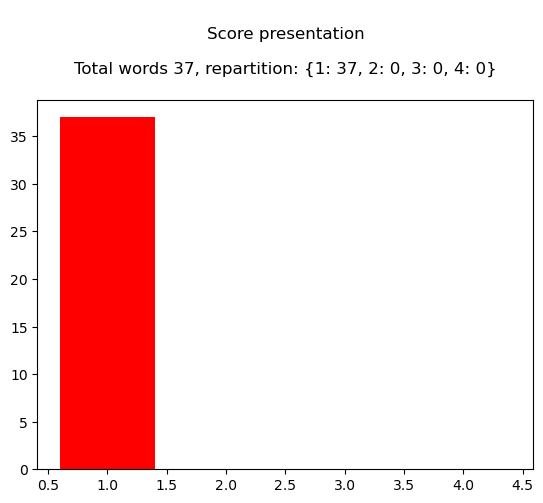

In [5]:
global_functions.show_level('JLPT5_fr_sentences.json', 'Score presentation')

In [2]:
exam.exam_JLPT5()


Alphabet training: Romanji, Hiragana, Katakana


1. Romanji to hiragana & katakana

nu
no
zo
ne
o
mo
po
ru
shi
yu
yo
ki

2. Hiragana to romanji & katakana

ば
ろ
ぬ
た
ほ
せ
ぜ
ひ
か
ど
り
れ

3. Katakana to romanji & hiragana

バ
ヲ
ソ
ヅ
コ
エ
ミ
ジ
ケ
ヒ
ウ
テ

Correction time.


1. Romanji's translation

nu => ['ぬ', 'ヌ']
no => ['の', 'ノ']
zo => ['ぞ', 'ゾ']
ne => ['ね', 'ネ']
o => ['お', 'オ']
mo => ['も', 'モ']
po => ['ぽ', 'ポ']
ru => ['る', 'ル']
shi => ['し', 'シ']
yu => ['ゆ', 'ュ']
yo => ['よ', 'ヨ']
ki => ['き', 'キ']

2. Hiragana's translation

ば => ['ba', 'バ']
ろ => ['ro', 'ロ']
ぬ => ['nu', 'ヌ']
た => ['ta', 'タ']
ほ => ['ho', 'ホ']
せ => ['se', 'セ']
ぜ => ['ze', 'ゼ']
ひ => ['hi', 'ヒ']
か => ['ka', 'カ']
ど => ['do', 'ド']
り => ['ri', 'リ']
れ => ['re', 'レ']

3. Katakana's translation

バ => ['ba', 'ば']
ヲ => ['wo', 'を']
ソ => ['so', 'そ']
ヅ => ['zu', 'づ']
コ => ['ko', 'こ']
エ => ['e', 'え']
ミ => ['mi', 'み']
ジ => ['ji', 'じ']
ケ => ['ke', 'け']
ヒ => ['hi', 'ひ']
ウ => ['u', 'う']
テ => ['te', 'て']


ValueError: invalid literal for int() with base 10: ''

In [4]:
print(len(jap_data.JLPT5_voc_fr)/10)
print(len(jap_data.JLPT5_voc_jap)/10)

32.3
32.3


In [5]:
len(jap_data.JLPT5_voc_fr)/10

29.1

In [3]:
print(len(jap_data.JLPT5_voc_jap), len(jap_data.JLPT5_voc_fr))

279 279


In [4]:
with open('JLPT5_fr_vocabulary.json', 'r') as file:
    data_fr = json.load(file)

with open('JLPT5_jap_vocabulary.json', 'r') as file:
    data_jap = json.load(file)

print(len(data_fr), len(data_jap))

265 265


In [3]:
global_functions.json_auto_update('JLPT5_fr_vocabulary.json', 'JLPT5_jap_vocabulary.json', jap_data.JLPT5_voc_fr, jap_data.JLPT5_voc_jap)

The json's file will be updated, adding the following words:
(じしょ | じびき) dictionnaire
(しずか) calme, silencieux
(しずかに) silencieusement, calmement; Silence !
(しつもん) question
(しつもんする) interroger, questionner
(じてんしゃ) vélo
(じどうしゃ) automobile, voiture
(じぶん) soi, soi-même
(しまる) se fermer, être fermer
(しめる) fermer
(しめる) lier
(しゃしん) photographie, photo
(しゃつ) chemise
(しゃわあ) douche
(じゅぎょう) cours, classe


In [7]:
with open('JLPT5_fr_vocabulary.json', 'r') as file:
    data_fr = json.load(file)

with open('JLPT5_jap_vocabulary.json', 'r') as file:
    data_jap = json.load(file)

print(len(data_fr), len(data_jap))

279 279


In [10]:
with open('JLPT5_jap_vocabulary.json', 'r') as file:
    data_jap = json.load(file)

data_jap['船']



[-2, 1, '(ふね) bateau']

In [11]:
global_functions.jap_JLPT_update_value('JLPT5_jap_vocabulary.json', '船', [-2, 1, '(セン | ふね) bateau'])

In [12]:
with open('JLPT5_jap_vocabulary.json', 'r') as file:
    data_jap = json.load(file)

data_jap['船']

[-2, 1, '(セン | ふね) bateau']

In [8]:
global_functions.jap_JLPT_update_key('JLPT5_fr_vocabulary.json',
                                     '(ふね) bateau',
                                     '(セン | ふね) bateau')

In [9]:
with open('JLPT5_fr_vocabulary.json', 'r') as file:
    data_jap = json.load(file)

data_jap['(セン | ふね) bateau']

[1, 1, '船']

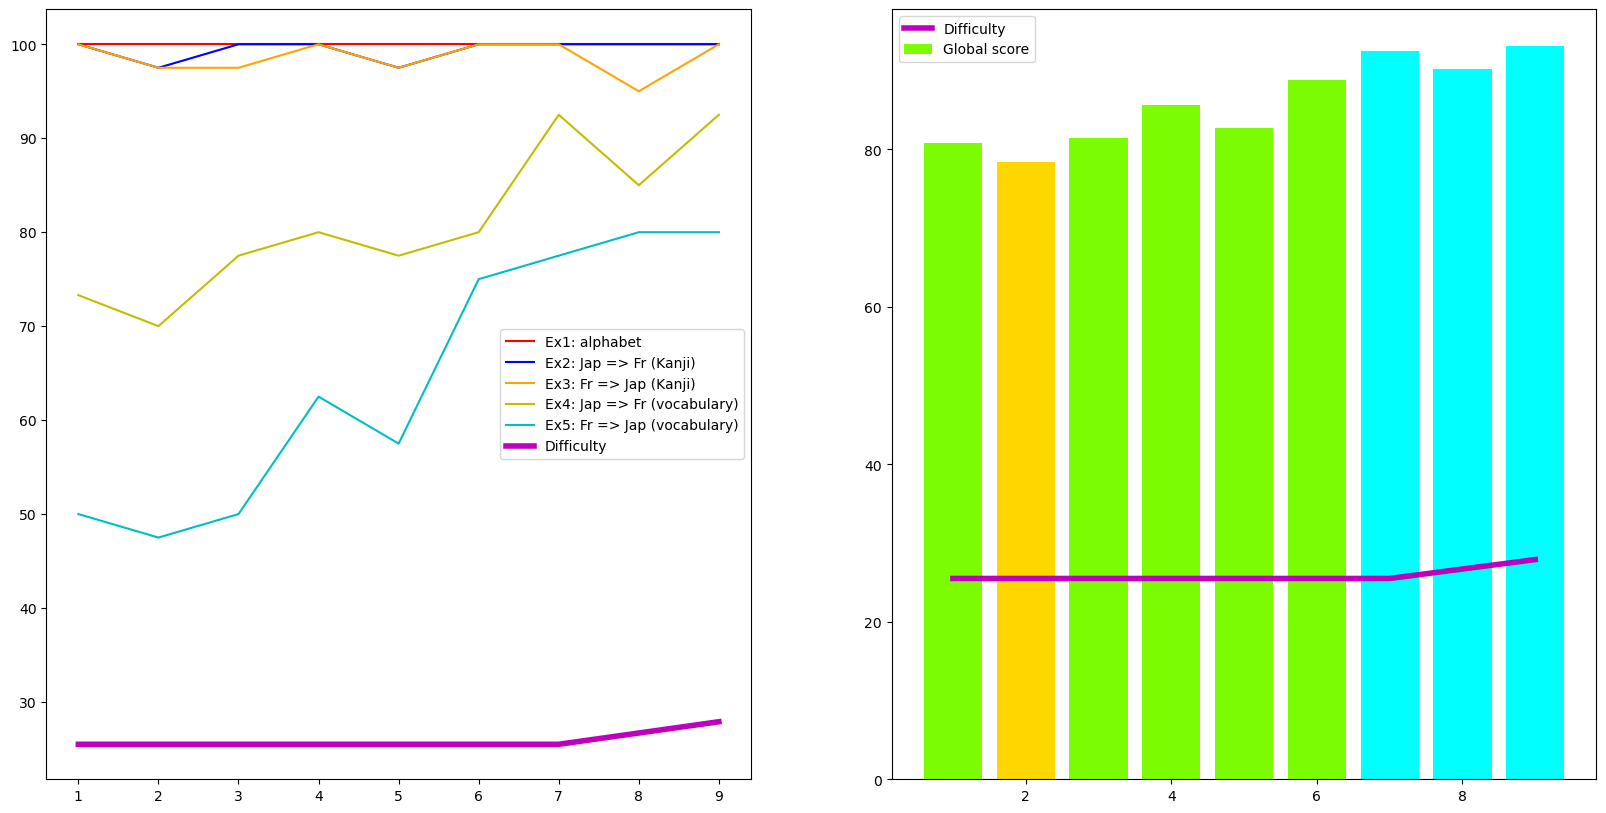

In [2]:
exam.get_evaluation_score_info_JLPT5()


Alphabet training: Romanji, Hiragana, Katakana


1. Romanji to hiragana & katakana

so
bi
wa
sa
pa
u
ku
ji
da
fu
ne
shi

2. Hiragana to romanji & katakana

づ
ぼ
な
べ
め
る
ば
ぞ
す
よ
ん
ヘ

3. Katakana to romanji & hiragana

オ
ギ
コ
プ
ヅ
ゴ
メ
チ
ナ
ブ
ペ
ネ

Correction time.


1. Romanji's translation

so => ['そ', 'ソ']
bi => ['び', 'ビ']
wa => ['わ', 'ワ']
sa => ['さ', 'サ']
pa => ['ぱ', 'パ']
u => ['う', 'ウ']
ku => ['く', 'ク']
ji => ['ぢ', 'ヂ']
da => ['だ', 'ダ']
fu => ['ふ', 'フ']
ne => ['ね', 'ネ']
shi => ['し', 'シ']

2. Hiragana's translation

づ => ['zu', 'ヅ']
ぼ => ['bo', 'ボ']
な => ['na', 'ナ']
べ => ['be', 'ベ']
め => ['me', 'メ']
る => ['ru', 'ル']
ば => ['ba', 'バ']
ぞ => ['zo', 'ゾ']
す => ['su', 'ス']
よ => ['yo', 'ヨ']
ん => ['n', 'ン']
ヘ => ['he', 'ヘ']

3. Katakana's translation

オ => ['o', 'お']
ギ => ['gi', 'ぎ']
コ => ['ko', 'こ']
プ => ['pu', 'ぷ']
ヅ => ['zu', 'づ']
ゴ => ['go', 'ご']
メ => ['me', 'め']
チ => ['tchi', 'ち']
ナ => ['na', 'な']
ブ => ['bu', 'ぶ']
ペ => ['pe', 'ぺ']
ネ => ['ne', 'ね']

Perfect! You did a great job :)


Kanji's ex

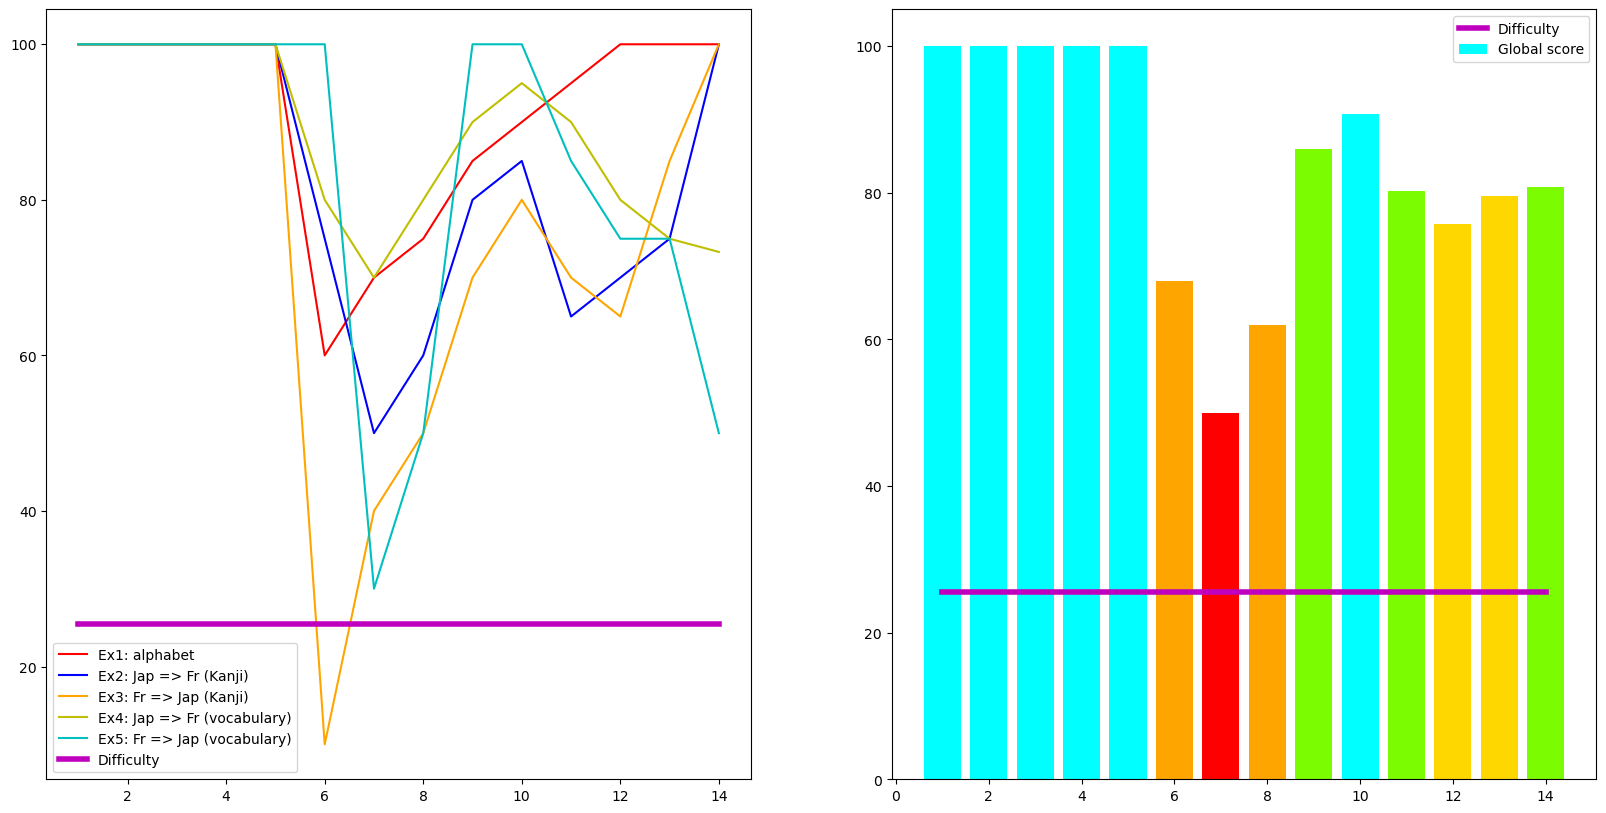

Exercise 1: perfect!
Exercise 2: perfect!
Exercise 3: perfect!
Error(s) Exercise 4:

停泊 => [-2, 1, '(ていはく) mouillage, ancrage']
喫茶店 => [-2, 1, '(きっさてん) salon de thé, café, buvette']
重い => [0, 1, '(おもい) lourd']
絵 => [1, 1, '(え) peinture, dessin, image']
食堂 => [-3, 1, '(しょくどう) salle à manger']
牛 => [-2, 1, '(うし) vache, bovin']
台所 => [3, 1, '(だいどころ) cuisine']
世 => [-2, 1, '(よ) monde, société, époque']

Error(s) Exercise 5:

(かぞく) (membre d'une) famille => [-4, 1, '家族']
(はなつ) libérer, lâcher, émettre, répandre => [-4, 1, '放つ']
(であるく) sortir, se promener, faire un tour => [1, 1, '出歩く']
(いぬ) chien => [7, 2, '犬']
(おぼえる) se souvenir, retenir| ressentir, considérer => [-1, 1, '覚える']
(うた) chanson => [5, 1, '歌']
(きらい) détesté => [-1, 1, '嫌い']
(おちゃ) thé vert => [-4, 1, 'お茶']
(かいだん) escalier => [-3, 1, '階段']
(にわ) jardin => [5, 1, '庭']
(きっぷ) ticket, billet => [-2, 1, '切符']
(いたい) douloureux => [2, 1, '痛い']
(えき) gare => [-3, 1, '駅']
(かさ) parapluie => [0, 1, '傘']
(はたらき) action, fonctionnement, capacité

In [5]:
import exam
exam.exam_JLPT5()

In [24]:
def get_score_info(knowledge_path, evaluation_path=None, lowest_scores_size=20):
    '''
    This function doesn't work if the user never took an evaluation yet.

    This function returns a list that contains:
    - [0]: The mean score
    - [1]: The mean level
    - [2]: The list of the "lowest_scores_size" lowest scores
    - [3]: The number of words for each level: {1: x1, 2: x2, ..., 4: x4}
    - [4]: The evolution of difficulty_size
    - [5]: The evolution of scores through evaluations

    "knowledge_path" is the path of the json file to study
    "evaluation_path" is the path to the evaluation results
    '''
    # Get knowledge's data and info
    mean_score, mean_level, lowest_score_list, level_words = global_functions.get_knowledge_info(knowledge_path, lowest_scores_size)

    # Get evaluation's data
    with open(evaluation_path, 'r') as file:
        evaluation_path = json.load(file)

    # Get the evolution of difficulty_size
    difficulty_evolution = []

    # Get the evolution of scores during evaluations
    score_evolution = []



    return [mean_score, mean_level, lowest_score_list, level_words, difficulty_evolution, score_evolution]

In [20]:
get_score_info('JLPT5_jap_vocabulary.json', 'JLPT5_jap_kanji.json')

(3.3137254901960786,
 1.3686274509803922,
 {'(あそこ)': [15, 3, 'là-bas'],
  '(あちら)': [13, 3, 'par là-bas'],
  '(あの)': [16, 3, 'heuu.. | cela'],
  '(アパート)': [17, 3, 'appartement'],
  'いい/よい': [12, 3, 'bon, bien'],
  'いいえ': [14, 3, 'non'],
  'いかが|いくつ': [5, 1, 'combien ? (pas un prix)'],
  'いくら': [11, 3, 'Combien ça coûte ?'],
  'いちばん': [4, 1, 'premier'],
  'いつ': [2, 1, 'quand'],
  'いろいろ': [3, 1, 'varié'],
  'お兄さん': [2, 1, '(おにいさん) frère aîné'],
  'お姉さん': [2, 1, '(おねえさん) soeur aînée'],
  'お弁当': [4, 1, '(おべんとう) boîte à bento'],
  'お手洗い': [3, 1, '(おてあらい) toilettes, salle de bain'],
  'お母さん': [2, 1, '(おかあさん) mère'],
  'お父さん': [2, 1, '(おとうさん) père, papa'],
  'お皿': [0, 1, '(おさら) assiette'],
  'お祖母さん': [3, 1, '(おばあさん) grand-mère'],
  'お祖父さん': [3, 1, '(おじいさん) grand-père']},
 {1: 206, 2: 6, 3: 41, 4: 2},
 [],
 [])